In [58]:

import arviz as az
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pymc as pm



In [59]:
def f_BetaNorm(alpha, beta, x):
    # without scipy.stats.beta
    x_max = (alpha - 1) / (alpha + beta - 2)
    y = x**(alpha-1) * (1 - x)**(beta-1)
    y_max = x_max**(alpha-1) * (1 - x_max)**(beta-1)
    y_normalized = y / y_max
    return y_normalized

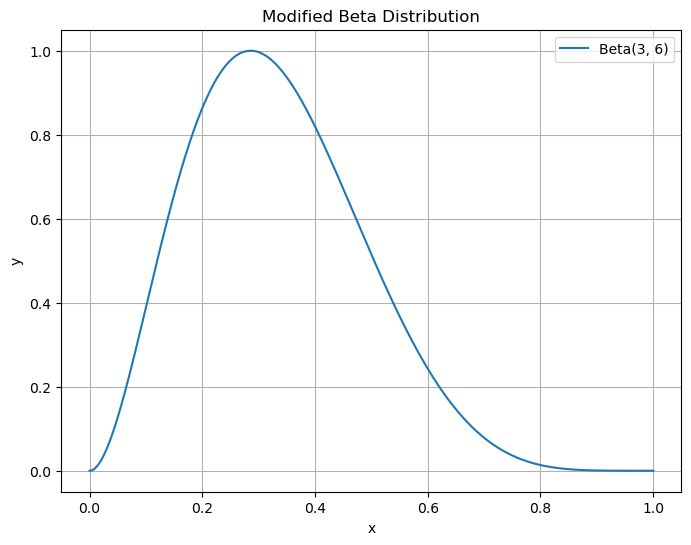

In [69]:
# plot f_BetaNorm
alpha_true = 3
beta_true = 6
sigma_true = 0.1
x = np.linspace(0, 1, 1000)
y_normalized = f_BetaNorm(alpha_true, beta_true, x)
plt.figure(figsize=(8, 6))
plt.plot(x, y_normalized, label=f'Beta({alpha_true}, {beta_true})')
plt.title('Modified Beta Distribution')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

In [70]:
# generate simuilation data from f_BetaNorm


n = 100
x_sampled = np.random.uniform(0, 1, n)
y_sampled = f_BetaNorm(alpha_true, beta_true, x_sampled) + np.random.normal(0, sigma_true, n)

# make y in [0, 1]
y_sampled = np.clip(y_sampled, 0, 1)


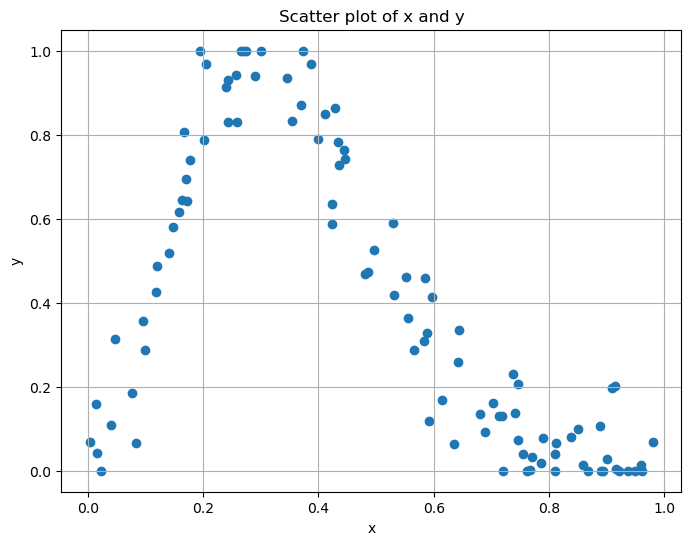

In [63]:
# plot x and y
plt.figure(figsize=(8, 6))
plt.scatter(x_sampled, y_sampled)
plt.title('Scatter plot of x and y')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

In [64]:

# Define the model
model = pm.Model()

with model:
    # Priors for unknown model parameters
    # gamma mean = alpha / beta, variance = alpha / beta^2

    # alpha = pm.Gamma("alpha", alpha=1, beta=1)
    # beta = pm.Gamma("beta", alpha=1, beta=1)
    
    # uniform prior
    alpha = pm.Uniform("alpha", lower=0, upper=10)
    beta = pm.Uniform("beta", lower=0, upper=10)
    sigma = pm.Gamma("sigma", alpha=1, beta=1)

    # Model function
    mu = f_BetaNorm(alpha, beta, x_sampled)

    # Likelihood (sampling distribution) of observations
    y_obs = pm.Normal("y_obs", mu=mu, sigma=sigma, observed=y_sampled)

    # draw 1000 posterior samples
    idata = pm.sample(tune=200, chains=2, cores=2)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [alpha, beta, sigma]


Sampling 2 chains for 200 tune and 1_000 draw iterations (400 + 2_000 draws total) took 8 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


array([[<Axes: title={'center': 'alpha'}>,
        <Axes: title={'center': 'alpha'}>],
       [<Axes: title={'center': 'beta'}>,
        <Axes: title={'center': 'beta'}>],
       [<Axes: title={'center': 'sigma'}>,
        <Axes: title={'center': 'sigma'}>]], dtype=object)

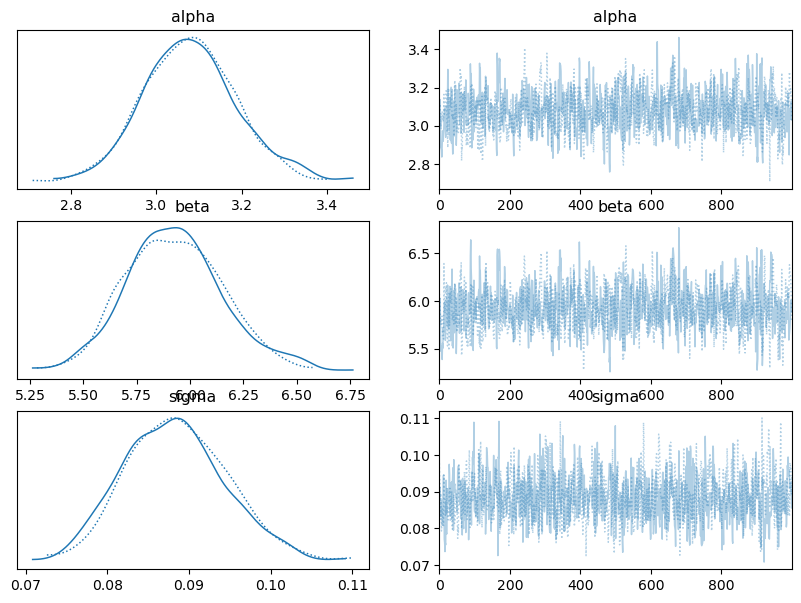

In [66]:
az.plot_trace(idata, figsize=(10, 7));


In [50]:
# map_estimate = pm.find_MAP(model=model) 
# alpha_MAP = map_estimate['alpha']
# beta_MAP = map_estimate['beta']
# sigma_MAP = map_estimate['sigma']


In [67]:
# mean of posterior distribution
alpha_estimated = np.mean(idata.posterior['alpha'].values)
beta_estimated = np.mean(idata.posterior['beta'].values)
sigma_estimated = np.mean(idata.posterior['sigma'].values)

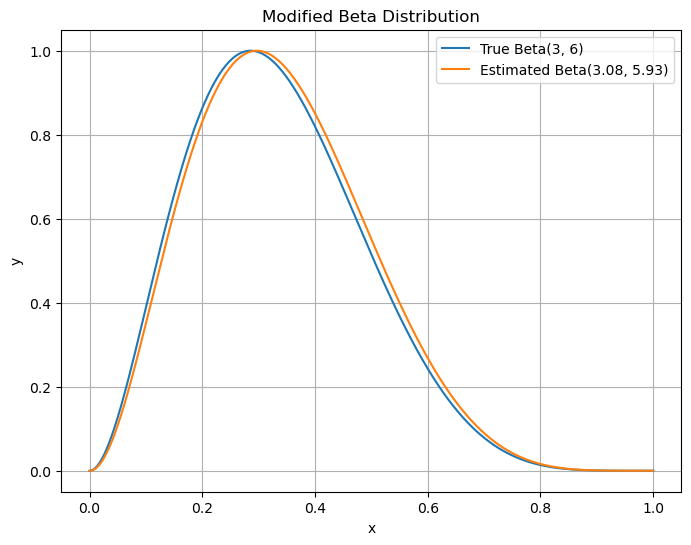

In [71]:
# Plot f_BetaNorm with estimated alpha and beta

# plot f_BetaNorm with true and estimated alpha and beta


y_estimated = f_BetaNorm(alpha_estimated, beta_estimated, x)

plt.figure(figsize=(8, 6))
plt.plot(x, y_normalized, label=f'True Beta({alpha_true}, {beta_true})')
plt.plot(x, y_estimated, label=f'Estimated Beta({alpha_estimated:.2f}, {beta_estimated:.2f})')
plt.title('Modified Beta Distribution')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()